## Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
n = 100
n_train = int(0.7*n)
n_test = int(0.3*n)
women = np.round(6 * np.random.randn(n,1)) + 155
men = np.round(10 * np.random.randn(n,1)) + 177
x = np.vstack((women[:n_train], men[:n_train]))
y = np.vstack((np.ones((n_train,1)), np.zeros((n_train,1))))

x_test = np.vstack((women[n_train:], men[n_train:]))
y_test = np.vstack((np.ones((n_test,1)), np.zeros((n_test,1))))

#normalize data
mu = np.mean(np.vstack((women, men)))
std = np.std(np.vstack((women, men)))

x = (x - mu) / std
x_test = (x_test - mu) / std

Text(0.5, 1.0, 'Data')

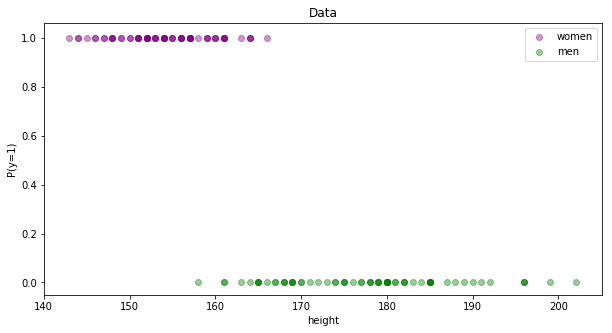

In [0]:
plt.figure(figsize=(10,5))
plt.scatter(women[:n_train], np.ones((n_train,1)), color='purple', label='women', alpha=0.4)
plt.scatter(men[:n_train], np.zeros((n_train,1)) , color='green', label='men', alpha=0.4)
plt.xlabel('height')
plt.ylabel('P(y=1)')
plt.legend()
plt.title('Data')

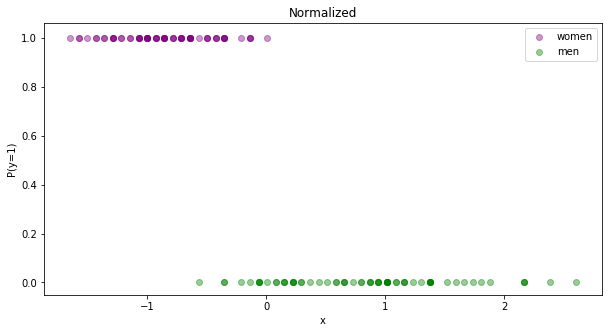

In [90]:
plt.figure(figsize=(10,5))
plt.scatter(x[:n_train], np.ones((n_train,1)), color='purple', label='women', alpha=0.4)
plt.scatter(x[n_train:], np.zeros((n_train,1)) , color='green', label='men', alpha=0.4)
plt.xlabel('x')
plt.ylabel('P(y=1)')
plt.title('Normalized')
plt.legend()

## Linear regression

In [0]:
x_linear = np.hstack((x, np.ones(x.shape)))
beta = np.dot(np.dot(np.linalg.inv(np.dot(x_linear.T, x_linear)), x_linear.T), y.reshape(-1,1))

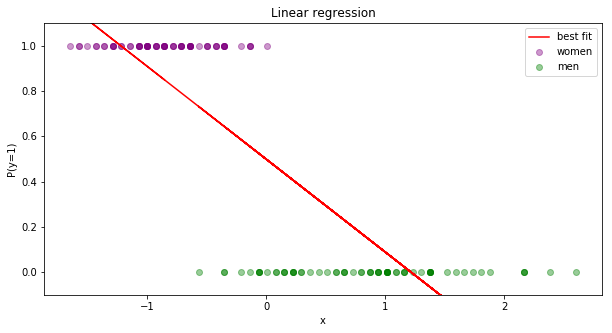

In [89]:
plt.figure(figsize=(10,5))
plt.scatter(x[:n_train], np.ones((n_train,1)), color='purple', label='women', alpha=0.4)
plt.scatter(x[n_train:], np.zeros((n_train,1)) , color='green', label='men', alpha=0.4)
plt.plot(x, np.dot(x_linear, beta), color='red', label='best fit')
plt.xlabel('x')
plt.ylabel('P(y=1)')
plt.ylim(-0.1, 1.1)
plt.title('Linear regression')
plt.legend()

### Classification

In [88]:
x_linear_test = np.hstack((x, np.ones(x.shape)))
probs = np.dot(x_linear, beta)
predicts = 1 * (probs >= 0.5)
accuracy = np.sum(predicts == y) / (2 * n_train) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 92.86%


In [87]:
x_linear_test = np.hstack((x_test, np.ones(x_test.shape)))
probs = np.dot(x_linear_test, beta)
predicts = 1 * (probs >= 0.5)
accuracy = np.sum(predicts == y_test) / (2 * n_test) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 96.67%


## Logistic regression

### Training

In [91]:
np.random.seed(42)
W = np.random.randn()
b = 0

n_iter = 1000
l_rate = 1e-3
eps = 1e-8

for i in range(n_iter):
    z = W*x + b
    a = 1. / (1 + np.exp(-z))
    loss = -np.sum(y * np.log(a + eps) + (1 - y) * np.log(1 - a + eps)) / (2 * n_train)
    
    da = - y / (a + eps) + (1 - y) / (1 - a + eps)
    dz = da * a * (1 - a)
    dW = np.sum(dz * x)
    db = np.sum(dz)
    
    W = W - l_rate * dW
    b = b - l_rate * db
    if i % 100 == 0:
        print('Epoch: {}, loss: {:.2f}, W: {:.2f}, b: {:.2f}'.format(i, loss, W, b))

Epoch: 0, loss: 0.93, W: 0.42, b: 0.00
Epoch: 100, loss: 0.24, W: -2.17, b: -0.10
Epoch: 200, loss: 0.19, W: -2.98, b: -0.26
Epoch: 300, loss: 0.17, W: -3.48, b: -0.39
Epoch: 400, loss: 0.16, W: -3.87, b: -0.49
Epoch: 500, loss: 0.15, W: -4.17, b: -0.57
Epoch: 600, loss: 0.15, W: -4.43, b: -0.64
Epoch: 700, loss: 0.14, W: -4.66, b: -0.70
Epoch: 800, loss: 0.14, W: -4.85, b: -0.75
Epoch: 900, loss: 0.14, W: -5.03, b: -0.79


### Classification

In [92]:
a_test = 1. / (1 + np.exp(-W * x - b))
predicts = 1 * (a_test >= 0.5)
accuracy = np.sum(predicts == y) / (2 * n_train) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 94.29%


In [93]:
a_test = 1. / (1 + np.exp(-W * x_test - b))
predicts = 1 * (a_test >= 0.5)
accuracy = np.sum(predicts == y_test) / (2 * n_test) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 93.33%


Text(0.5, 1.0, 'Predictions')

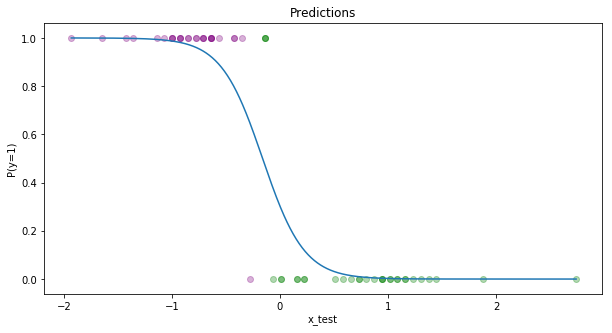

In [95]:
plt.figure(figsize=(10,5))
labels = [0, 1]
colors = ['green', 'purple']

for i, c in zip(labels, colors):
    plt.scatter(x_test[predicts == i], y_test[predicts==i], color=c, alpha=0.3)

test = np.linspace(np.min(x_test), np.max(x_test), 1000)
z_test = W * test + b
plt.plot(test, 1. / (1 + np.exp(-z_test)))

#plt.plot(np.zeros(10) -b / W, np.linspace(0, 1, 10))

plt.xlabel('x_test')
plt.ylabel('P(y=1)')
plt.title('Predictions')

### MNIST

In [0]:
import random
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home=r'.\MNIST')

C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Michal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
ids = [i for i in range(mnist.target.size) if mnist.target[i] in [0,1]]
data = mnist.data[ids]
labels = mnist.target[ids]
imgs = data.reshape(-1, 28, 28)

n = data.shape[0]
n_train = int(0.7*n) 
n_test = int(0.3*n)

# normalize
mu = np.mean(data)
std = np.std(data)
data_norm = (data - mu) / std

inds = np.arange(n)
random.shuffle(inds)
X = data_norm[inds[:n_train]]
y = labels[inds[:n_train]].reshape(-1,1)
X_test = data_norm[inds[n_train:]]
y_test = labels[inds[n_train:]].reshape(-1,1)

(-0.5, 27.5, 27.5, -0.5)

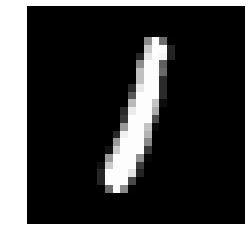

In [0]:
plt.imshow(imgs[-1], cmap='gray')
plt.axis('off')

In [0]:
n_iter = 1000
l_rate = 1e-4
eps = 1e-8
d = X.shape[1]

np.random.seed(42)
W = np.random.randn(d,1)
b = 0

for i in range(n_iter):
    z = np.dot(X, W) + b
    a = 1. / (1 + np.exp(-z))
    loss = -np.sum(y * np.log(a + eps) + (1 - y) * np.log(1 - a + eps)) / n_train
    
    da = - y / (a + eps) + (1 - y) / (1 - a + eps)
    dz = da * a * (1 - a)
    dW = np.sum(dz * X, axis=0).reshape(-1,1)
    db = np.sum(dz, axis=0, keepdims=True)
    
    W = W - l_rate * dW
    b = b - l_rate * db
    
    if i % 100 == 0:
        print('Epoch: {}, loss: {:.4f}'.format(i, loss))
        z_test = np.dot(X_test, W) + b
        a_test = 1. / (1 + np.exp(-z_test))
        preds = 1 * (a_test >= 0.5)
        accuracy = np.sum(preds == y_test) / n_test * 100
        print('Accuracy: {:.2f}%'.format(accuracy))

Epoch: 0, loss: 0.7849
Accuracy: 98.38%
Epoch: 100, loss: 0.0203
Accuracy: 99.71%
Epoch: 200, loss: 0.0130
Accuracy: 99.77%
Epoch: 300, loss: 0.0095
Accuracy: 99.82%
Epoch: 400, loss: 0.0077
Accuracy: 99.84%
Epoch: 500, loss: 0.0068
Accuracy: 99.86%
Epoch: 600, loss: 0.0061
Accuracy: 99.86%
Epoch: 700, loss: 0.0058
Accuracy: 99.86%
Epoch: 800, loss: 0.0056
Accuracy: 99.86%
Epoch: 900, loss: 0.0055
Accuracy: 99.84%


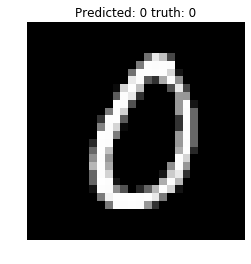

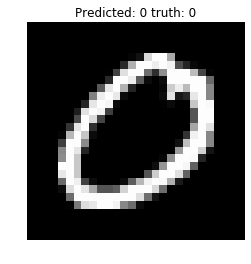

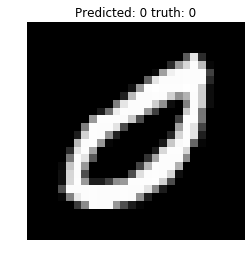

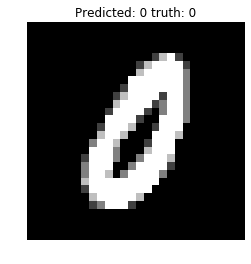

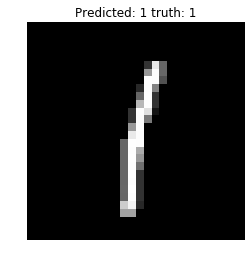

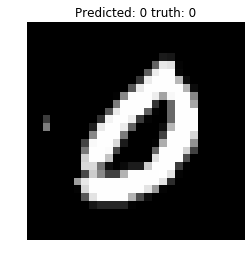

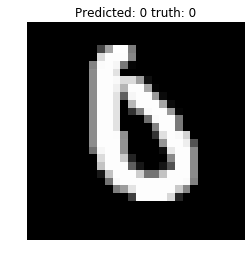

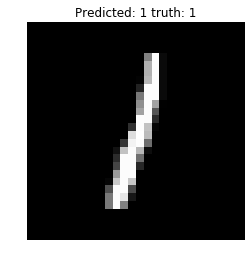

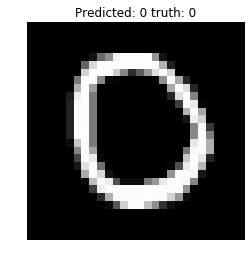

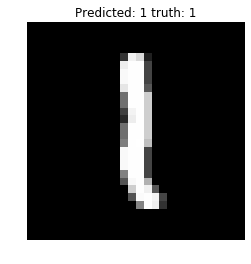

In [0]:
for i in range(10):
    plt.imshow(X_test.reshape(-1, 28, 28)[i], cmap='gray')
    plt.axis('off')
    plt.title('Predicted: ' + str(preds[i][0]) + ' truth: ' + str(int(y_test[i])))
    plt.show()

## Softmax regression

In [0]:
data = mnist.data
labels = mnist.target
imgs = data.reshape(-1, 28, 28)

n = data.shape[0]
n_train = int(0.9*n)
n_test = int(0.1*n)

# normalize
mu = np.mean(data)
std = np.std(data)
data_norm = (data - mu) / std

inds = np.arange(n)
random.shuffle(inds)
X = data_norm[inds[:n_train]]
y = labels[inds[:n_train]].reshape(-1,1)
X_test = data_norm[inds[n_train:]]
y_test = labels[inds[n_train:]].reshape(-1,1)

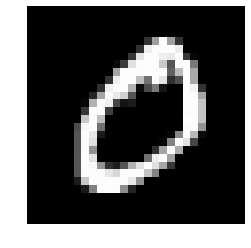

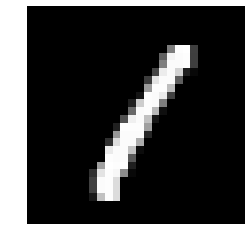

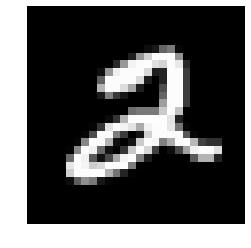

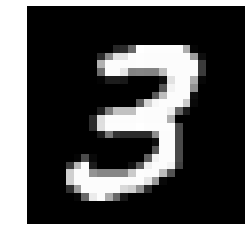

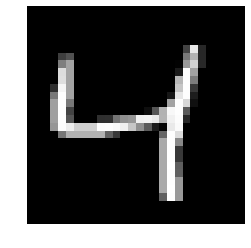

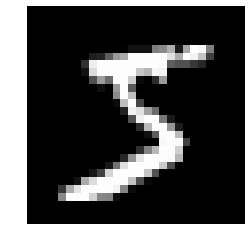

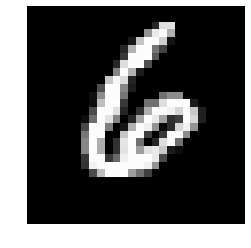

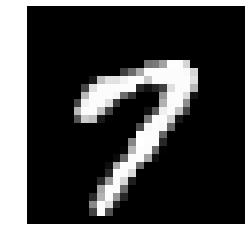

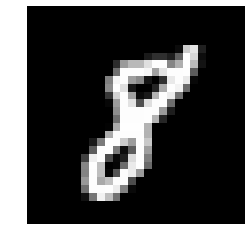

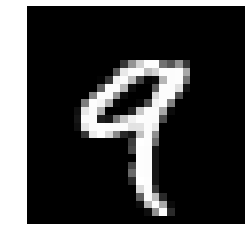

In [0]:
for i in range(10):
    plt.imshow(imgs[labels==i][0], cmap='gray')
    plt.axis('off')
    plt.show()

In [0]:
X.shape

(63000, 784)

In [0]:
n_iter = 1000
l_rate = 1e-2
eps = 1e-8
d = X.shape[1]

# one-hot
y_oh = np.zeros((n_train, 10))
y_oh[range(n_train), y.astype('int').flatten()] = 1

np.random.seed(42)
W = np.random.randn(d,10)
b = np.zeros((1,10))

In [0]:
for i in range(n_iter):
    z = np.dot(X, W) + b
    a = np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    loss = -np.sum(y_oh * np.log(a)) / n_train
    
    dW = - np.dot(X.T, y_oh - a) / n_train
    db = - np.sum(y_oh - a, axis=0)/ n_train
    
    W = W - l_rate * dW
    b = b - l_rate * db
    
    if i % 100 == 0:
        print('Epoch: {}, loss: {:.4f}'.format(i, loss))
        z_test = np.dot(X_test, W) + b
        a_test = np.exp(z_test) / np.sum(np.exp(z_test), axis=1, keepdims=True)
        preds = np.argmax(a_test, axis=1).reshape(-1,1)
        accuracy = np.sum(preds == y_test) / n_test * 100
        print('Accuracy: {:.2f}%'.format(accuracy))

Epoch: 0, loss: 3.5473
Accuracy: 74.59%
Epoch: 100, loss: 3.4637
Accuracy: 75.09%
Epoch: 200, loss: 3.3869
Accuracy: 75.57%
Epoch: 300, loss: 3.3158
Accuracy: 75.90%
Epoch: 400, loss: 3.2497
Accuracy: 76.41%
Epoch: 500, loss: 3.1879
Accuracy: 76.77%
Epoch: 600, loss: 3.1300
Accuracy: 77.20%
Epoch: 700, loss: 3.0754
Accuracy: 77.53%
Epoch: 800, loss: 3.0240
Accuracy: 77.87%
Epoch: 900, loss: 2.9753
Accuracy: 78.11%


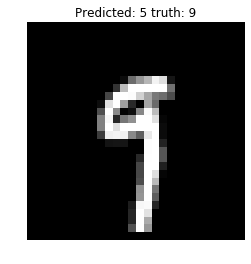

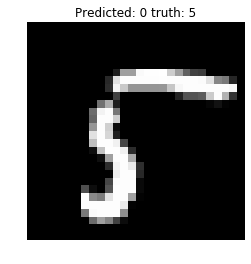

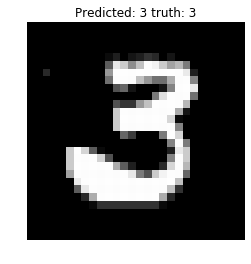

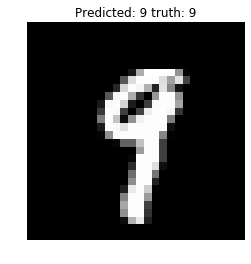

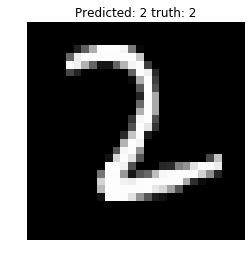

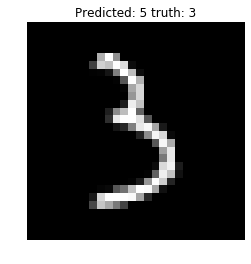

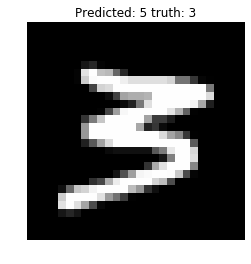

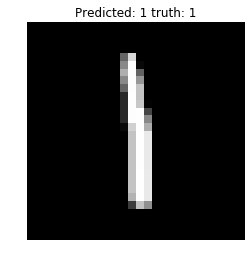

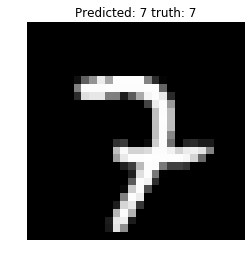

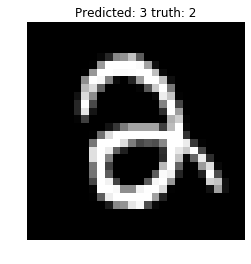

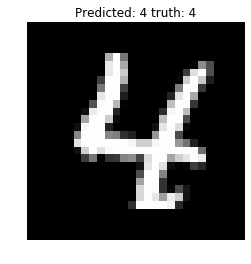

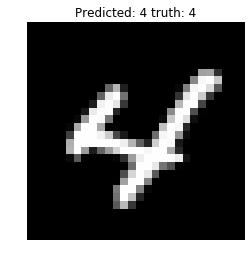

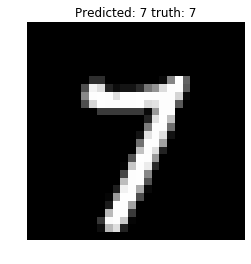

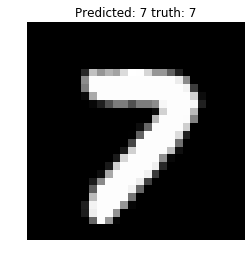

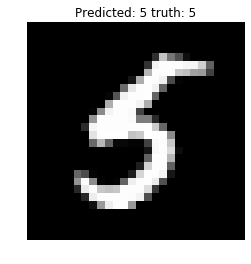

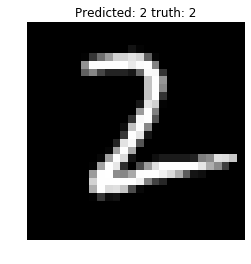

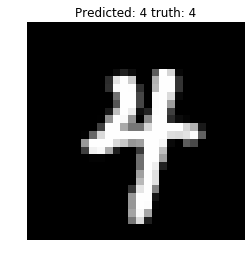

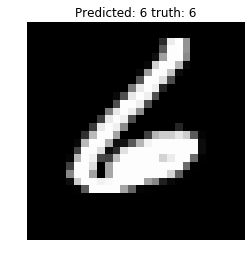

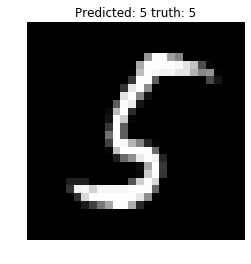

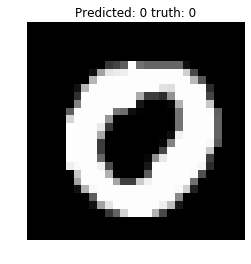

In [0]:
for i in range(20):
    plt.imshow(X_test.reshape(-1, 28, 28)[i], cmap='gray')
    plt.axis('off')
    plt.title('Predicted: ' + str(preds[i][0]) + ' truth: ' + str(int(y_test[i])))
    plt.show()